# Plot de Histograma 3D - time residuals, cos(angulo entre dirección de eventos y hits), counts


In [1]:
from analysis_simulation import Analysis_simulation, magnitude
import uproot
import numpy as np
from numpy import array, where, shape, reshape, pi

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sn

import pandas as pd

# 1 - Extraer datos

## 1.1 - datos simulados

In [2]:
file = uproot.open("/snoplus simulations/electron bulk/center point/simu_Analysis_elec_z_10MeV.root")
data1 = file['T;1']
evtid = np.array(data1['mcID'])

### ¡Necesito extraer las coordenadas de todos los PMTs que dan Hit!

Usar el modulus simplification (Atencion que debo aletrar el nombre del Branch de donde la informacion de los PMTs es extraida!)

In [3]:
#df = Analysis_simulation(file, [0,2,3,4])
ID_list = np.unique(evtid)
df = Analysis_simulation(file, ID_list)
df.head()

,eventID,hitpmt ID,hit type,time residual,mc coordinates,mc radius,reconst radius,reconst error,PMT xyz,PMT spherical,hitpmt ID hit 1,hitpmt ID hit 2,time residual hit 1,time residual hit 2,xyz hit 1,spherical hit 1,xyz hit 2,spherical hit 2
0,0,"[2424, 3682, 2411, 7239, 569, 1449, 1205, 1574...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.5409747508129215, 1.6564565063149814, 1.656...","[0.0, 0.0, 0.0]",0.0,181.657005,181.657005,"[[-590.79, 8176.05, -1561.49], [-2919.72, 1646...","[[1.759028044689376, 1.64292956685092, 8344.76...","[2424, 3682, 2411, 7239, 569, 1449, 1205, 1574...","[8290, 3174, 2081, 3199, 6171, 1604, 6168, 160...","[2.5409747508129215, 1.6564565063149814, 1.656...","[6.554489572970084, 4.879386288335752, 61.2231...","[[-590.79, 8176.05, -1561.49], [-2919.72, 1646...","[[1.759028044689376, 1.64292956685092, 8344.76...","[[238.87, 173.53000000000003, -8383.13], [-173...","[[3.106387869697725, 0.6282658828853215, 8388...."
1,1,"[8352, 5699, 5186, 8749, 5804, 5705, 633, 30, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.7930043812196175, 3.123549413376878, 38.014...","[0.0, 0.0, 0.0]",0.0,172.683769,172.683769,"[[2731.3099999999995, -4010.33, -6769.67], [-2...","[[2.5197199999614193, -0.9728892876186394, 832...","[8352, 5699, 5186, 8749, 5804, 5705, 633, 30, ...","[8753, 104, 5558, 5159, 561, 3767, 4947, 371, ...","[1.7930043812196175, 3.123549413376878, 38.014...","[3.7188610438247167, 6.413695344790369, 3.7106...","[[2731.3099999999995, -4010.33, -6769.67], [-2...","[[2.5197199999614193, -0.9728892876186394, 832...","[[5470.75, -2046.34, -6020.08], [7492.68, 1427...","[[2.371296355357669, -0.35793848965200614, 838..."
2,2,"[6949, 5699, 3277, 3716, 7181, 598, 3155, 7417...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-27.382755131366963, 3.178478660295127, 5.222...","[0.0, 0.0, 0.0]",0.0,221.482750,221.482750,"[[-1102.76, -3030.5299999999997, 7769.49], [-2...","[[0.3934354317550228, -1.9197856266208262, 841...","[5699, 3277, 3716, 7181, 598, 3155, 7417, 8286...","[6949, 3097, 3789, 7212, 389, 9017, 1420, 5182...","[3.178478660295127, 5.222143012341803, 2.76460...","[-27.382755131366963, 20.710644655148116, 3.82...","[[-2970.05, -3836.88, -6769.67], [-3447.930000...","[[2.519719556368662, -2.229531026142379, 8328....","[[-1102.76, -3030.5299999999997, 7769.49], [-1...","[[0.3934354317550228, -1.9197856266208262, 841..."
3,3,"[1152, 1577, 6185, 616, 6691, 3549, 8743, 1956...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.151269292659805, 16.381693621352582, 97.595...","[0.0, 0.0, 0.0]",0.0,168.073994,168.073994,"[[4340.02, 4596.63, -5539.02], [1937.139999999...","[[2.2902952577355187, 0.8141046147804328, 8405...","[1152, 1577, 6185, 616, 6691, 3549, 8743, 1956...","[5725, 8367, 4631, 7803, 865, 1716, 1922, 2402...","[2.151269292659805, 16.381693621352582, 97.595...","[2.8597519346029117, 0.8675102807366102, 2.175...","[[4340.02, 4596.63, -5539.02], [1937.139999999...","[[2.2902952577355187, 0.8141046147804328, 8405...","[[-4138.42, -4942.6, -5409.95], [3444.15, -499...","[[2.2690003874444638, -2.267868766946875, 8415..."
4,4,"[6178, 779, 8625, 1182, 1245, 6177, 9437, 5739...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-10256.336359066212, -97.29984150115689, -22....","[0.0, 0.0, 0.0]",0.0,174.357024,174.357024,"[[-611.49, -2710.66, -7950.9400000000005], [59...","[[2.805371995345711, -1.7926695341698105, 8422...","[1182, 1245, 6177, 9437, 5739, 9280, 7704, 293...","[6178, 779, 8625, 8722, 57, 2691, 524, 5770, 1...","[3.390873182541071, 2.8870031792992563, 5.9877...","[-10256.336359066212, -97.29984150115689, -22....","[[3414.34, 5961.799999999999, -4837.83], [2084...","[[2.1843138558709847, 1.050690111048758, 8402....","[[-611.49, -2710.66, -7950.9400000000005], [59...","[[2.805371995345711, -1.7926695341698105, 8422..."


### 1.1.1 Check reconstruction Error

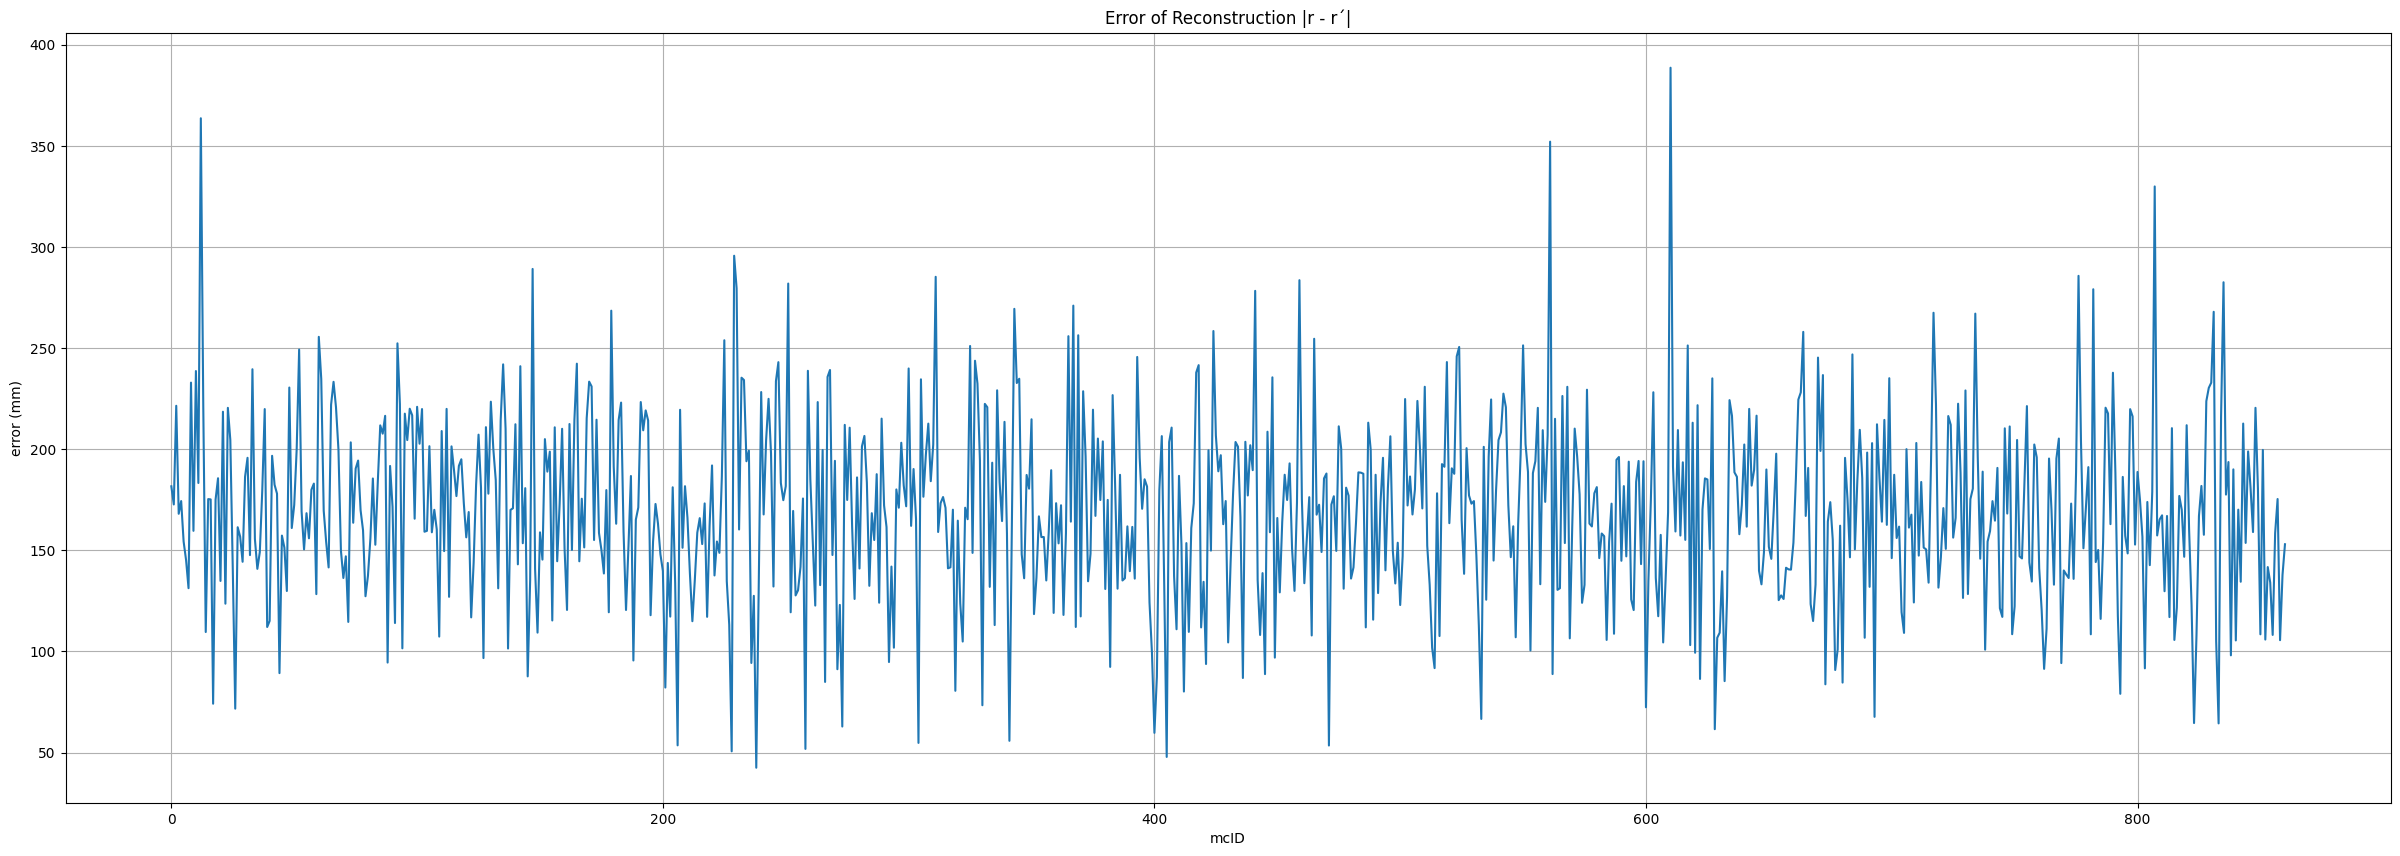

In [5]:
recons_error = np.array(df['reconst error'])

matplotlib.rcdefaults()

plt.figure(figsize=(30,10))
plt.title('Error of Reconstruction |r - r´|')
plt.ylabel('error (mm)')
plt.xlabel('mcID')

plt.plot(recons_error)
plt.grid()
#plt.xticks(ID)
plt.show()

## 1.2 - calculo de observable $cos(\alpha)$

- calculo del coseno via la definición de producto escalar;
- Uso las funciones de numpy np.dot() para calcular producto escalar y np.linalg.norm() para calcular la norma de los vectores

In [6]:
# event direction:
vec_ev = np.array([0.0, 0.0, -1.0])

#proof
print('scalar product', np.dot(vec_ev,vec_ev))
print('norm',np.linalg.norm(vec_ev))

scalar product 1.0
norm 1.0


In [7]:
# extract the xyz_hit_coordinantes_type1 and time_residuals of ev_id = ?
ID = 3
evt_id_n = df.loc[df['eventID'] == ID]

#pmt_id = (evt_id_n['hitpmt ID']).to_numpy()[0]
xyz_hit = (evt_id_n['PMT xyz']).to_numpy()[0]
xyz_hit_1 = (evt_id_n['xyz hit 1']).to_numpy()[0][0]
xyz_hit_2 = (evt_id_n['xyz hit 2']).to_numpy()[0][0]

time_residual_hit1 = (evt_id_n['time residual hit 1']).to_numpy()[0]
time_residual = (evt_id_n['time residual']).to_numpy()[0]

In [7]:
xyz_hit[0]

array([ 4340.02,  4596.63, -5539.02])

In [8]:
#Compute cos(angle)
vec_ev = np.array([0.0, 0.0, -1.0])
cos_angle = np.array([])

N = shape(xyz_hit)[0] 
for i in range(N):
    cos_val = np.dot(xyz_hit[i],vec_ev)/np.linalg.norm(xyz_hit[i])
    cos_angle = np.append(cos_angle, cos_val)
cos_angle

array([ 0.65900788,  0.67050967,  0.80296078, ..., -0.45161998,
       -0.28393995,  0.85669136])

In [9]:
len(cos_angle)

2519

In [10]:
len(time_residual)

2519

# 2 - Gráficos

## 2.1 - 2D histogram

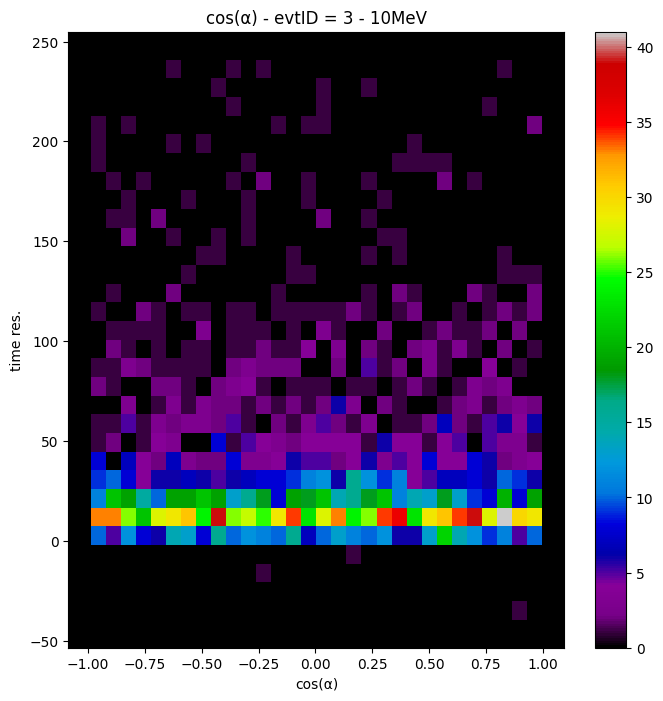

In [11]:
title = 'cos(α) - evtID = 3 - 10MeV'

plt.figure(figsize=(8,8))
sn.set_style(rc = {'axes.facecolor': 'black'})
sn.histplot(x = cos_angle, y = time_residual, bins = [30,30], stat='count', cbar = 'True', cmap = cm.nipy_spectral)
plt.ylabel('time res.')
plt.xlabel('cos(α)')
plt.title(title)

#equal acis ration
#ax = plt.gca()
#ax.set_aspect('equal', adjustable='box')
plt.show()

In [116]:
from Chev_vs_Scint_plots import angle_hit_direction, angle_hit_direction3D

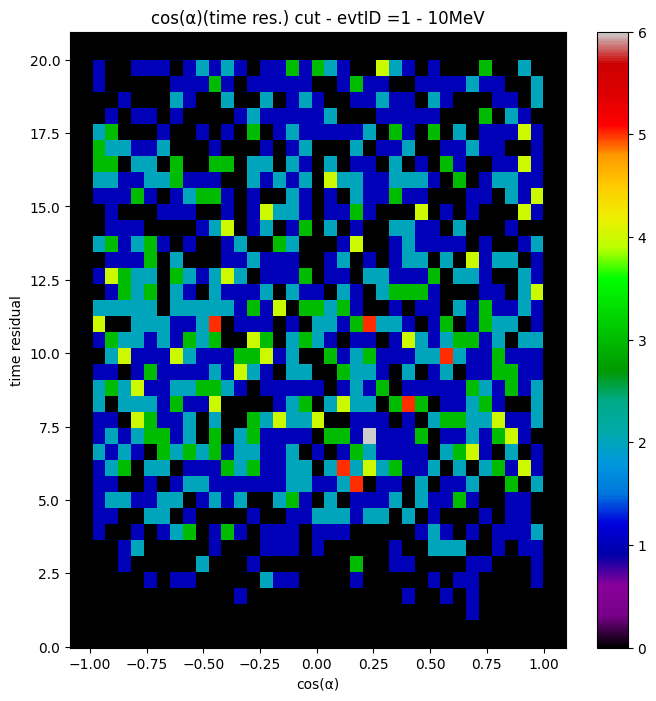

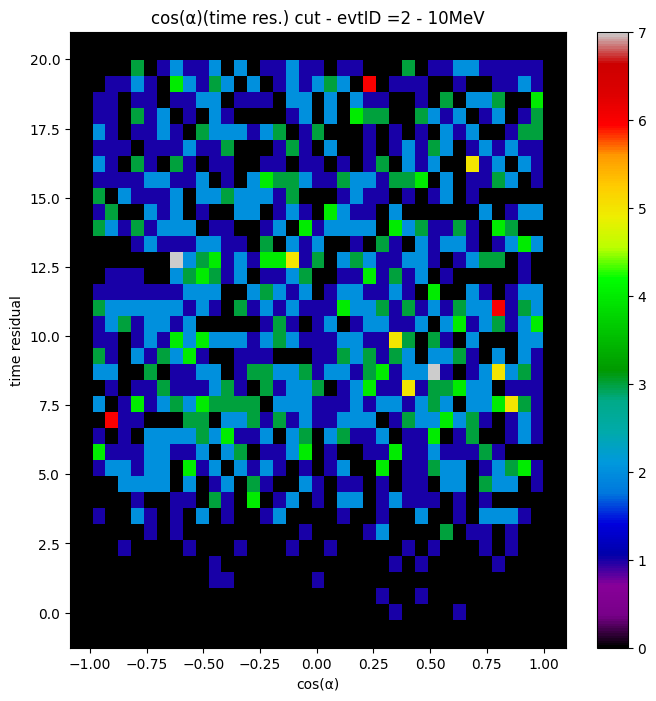

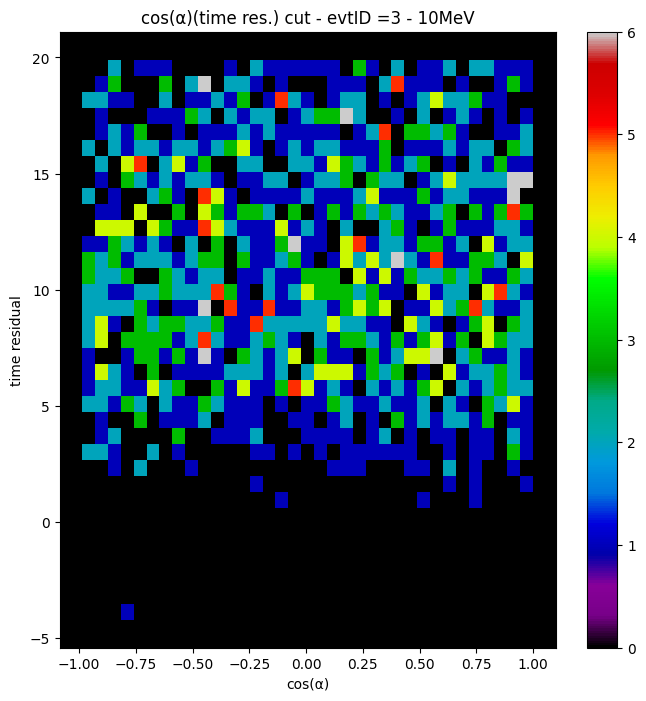

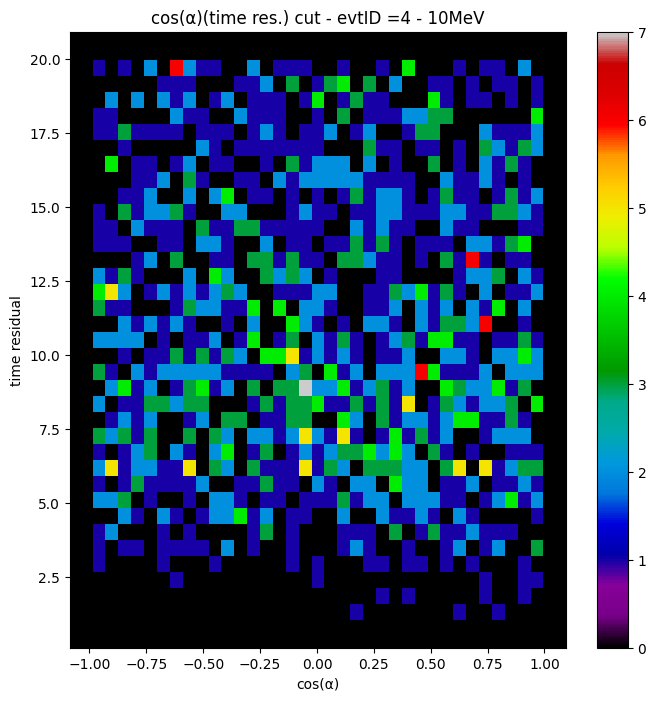

In [6]:
angle_hit_direction(df, bins = 35, cut = True, inf_cut = -5, up_cut = 20)

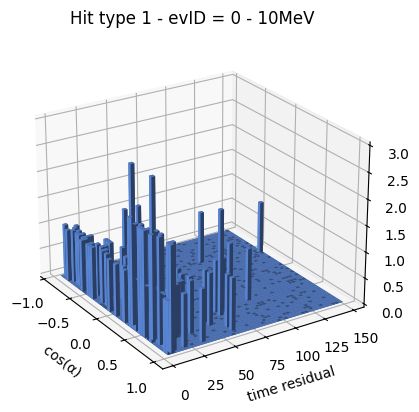

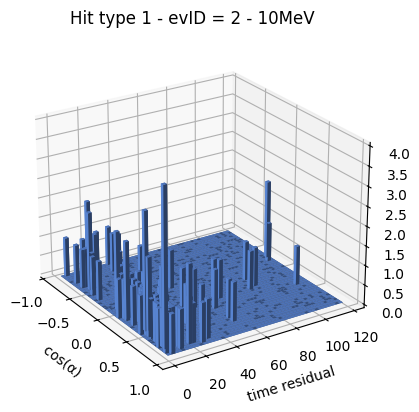

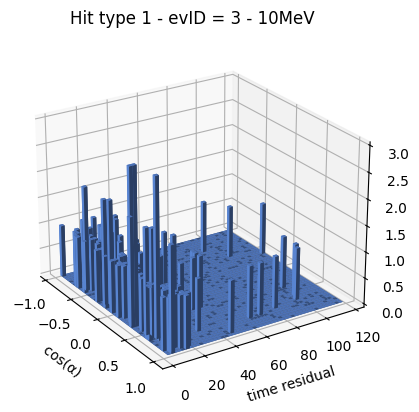

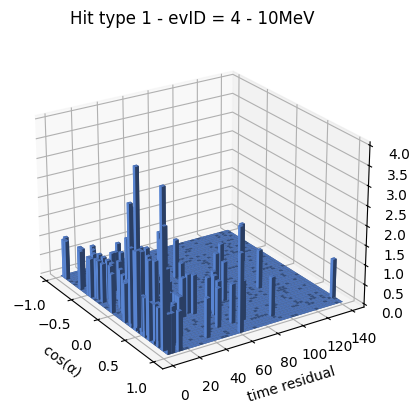

In [8]:
angle_hit_direction3D(df, bins = 50)

## 2.2 - 3D histogram

In [21]:
#importing the libraries
%matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#extract count of events
counts, x_bin_edges, y_bin_edges = np.histogram2d(x = cos_angle, y = time_residual, bins = [30, 30]) #PROBLEMA! No me deja usar nº diferente de bins

#Obtain coordinates of bins ---------------------------------
x_bin = [] # x_bin coordinate
y_bin = [] # y_bin coordinate

Nx = len(x_bin_edges)
Ny = len(y_bin_edges)

for (x_i, y_i) in zip(range(Nx-1), range(Ny-1)):
    mid_point_x = (x_bin_edges[x_i] + x_bin_edges[x_i+1])/2
    mid_point_y = (y_bin_edges[x_i] + y_bin_edges[x_i+1])/2
    
    x_bin.append(mid_point_x)
    y_bin.append(mid_point_y)
#----------------------------------------------------------------

xx, yy = np.meshgrid(x_bin, y_bin)

x, y = xx.ravel(), yy.ravel()
z = 0

bin_width_x = x_bin_edges[1] - x_bin_edges[0]
bin_width_y = y_bin_edges[1] - y_bin_edges[0]

dx = bin_width_x
dy = bin_width_y
dz = counts.T.ravel()

#plotting 3D bars
#more style: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
style.use('seaborn-v0_8-colorblind')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#colors: https://matplotlib.org/stable/gallery/color/named_colors.html
ax.bar3d(x, y, z, dx, dy, dz, color='cornflowerblue' )
ax.view_init(elev=24., azim=-33)

ax.set_xlabel('cos(α)')
ax.set_ylabel('time residual')
ax.set_zlabel('Counts')
plt.show()

#plt.savefig('proof.png', format='png')

Using matplotlib backend: TkAgg


### 2.2.1 - 3D plot con cortes en time residual

In [22]:
inf_cut = -5
up_cut = 30

time_residual_cut = np.array([]) 
cos_angle_cut = np.array([])                                  

#cuts
for i in np.where((np.array(time_residual) > inf_cut) & (np.array(time_residual) < up_cut))[0]:
    time_residual_cut = np.append(time_residual_cut, time_residual[i])
    cos_angle_cut = np.append(cos_angle_cut, cos_angle[i])

counts, x_bin_edges, y_bin_edges = np.histogram2d(x = cos_angle_cut, y = time_residual_cut, bins = [50, 50])

#Obtain coordinates of bins ---------------------------------
x_bin = []
y_bin = []

Nx = len(x_bin_edges)
Ny = len(y_bin_edges)

for (x_i, y_i) in zip(range(Nx-1), range(Ny-1)):
    mid_point_x = (x_bin_edges[x_i] + x_bin_edges[x_i+1])/2
    mid_point_y = (y_bin_edges[x_i] + y_bin_edges[x_i+1])/2
    
    x_bin.append(mid_point_x)
    y_bin.append(mid_point_y)
#----------------------------------------------------------------

xx, yy = np.meshgrid(x_bin, y_bin)

x, y = xx.ravel(), yy.ravel()
z = 0

bin_width_x = x_bin_edges[1] - x_bin_edges[0]
bin_width_y = y_bin_edges[1] - y_bin_edges[0]

dx = bin_width_x
dy = bin_width_y
dz = counts.T.ravel()

#plotting 3D bars
#more style: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
style.use('seaborn-v0_8-colorblind')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#colors: https://matplotlib.org/stable/gallery/color/named_colors.html
ax.bar3d(x, y, z, dx, dy, dz, color='cornflowerblue' )
ax.view_init(elev=24., azim=-33)

title = 'Hit type 1 - cut - evID = ' + str(ID) + ' - 10MeV ' 
x_title = ' cos(α) '
y_title = ' time residual '
z_title = 'Counts'

plt.title(title)
ax.set_xlabel(x_title)
ax.set_ylabel(y_title)
ax.set_zlabel(z_title)

plt.show()

## 2.3 Superposition 2D histograms: Multiples evIDs

In [8]:
# extract the xyz_hit_coordinantes and time_residuals of ev_id

multi_cos_angle = []
multi_time_residual = np.array([])
multi_pmt_ID = np.array([], dtype= np.int64)

vec_ev = np.array([0.0, 0.0, -1.0])

for id_x in ID_list:
    evt_id_n = df.loc[df['eventID'] == id_x]
    time_residual_id = (evt_id_n['time residual']).to_numpy()[0]
    xyz_hit_id = (evt_id_n['PMT xyz']).to_numpy()[0]
    pmt_id = (evt_id_n['hitpmt ID']).to_numpy()[0]
    
    multi_time_residual = np.append(multi_time_residual, time_residual_id).ravel()
    multi_pmt_ID = np.append(multi_pmt_ID, pmt_id).ravel()
    
    #xyz_hit_1 = (evt_id_n['xyz hit 1']).to_numpy()[0][0]
    #xyz_hit_2 = (evt_id_n['xyz hit 2']).to_numpy()[0][0]
    #time_residual_hit1 = (evt_id_n['time residual hit 1']).to_numpy()[0]

    #compute cos(alpha)
    N = shape(xyz_hit_id)[0]
    for k in range(N):
        cos_val = np.dot(xyz_hit_id[k],vec_ev)/np.linalg.norm(xyz_hit_id[k])
        multi_cos_angle.append(cos_val)

In [9]:
len(multi_pmt_ID)

2223874

In [10]:
len(multi_cos_angle)

2223874

In [11]:
len(multi_time_residual)

2223874

In [12]:
multi_time_residual[0]

2.5409747508129215

In [24]:
# Time residual cuts

up_cut = 14
inf_cut = -5

multi_time_res_cut = []
multi_cos_angle_cut = []
multi_pmt_ID_cut = []

for i in np.where((multi_time_residual > inf_cut) & (multi_time_residual < up_cut))[0]:

    multi_time_res_cut.append(multi_time_residual[i])
    multi_cos_angle_cut.append(multi_cos_angle[i])
    multi_pmt_ID_cut.append(multi_pmt_ID[i])


In [19]:
len(multi_time_res_cut)

851590

In [20]:
len(multi_cos_angle_cut)

851590

In [21]:
%matplotlib
# 2d Histogram
title = 'cos(α) - Multiple evID - 10MeV'

plt.figure(figsize=(8,8))
sn.set_style(rc = {'axes.facecolor': 'black'})
sn.histplot(x = multi_cos_angle_cut, y = multi_time_res_cut, bins = [30,30], stat='count', cbar = 'True', cmap = cm.nipy_spectral)
plt.ylabel('time res.')
plt.xlabel('cos(α)')
plt.title(title)

#equal acis ration
#ax = plt.gca()
#ax.set_aspect('equal', adjustable='box')
plt.show()

Using matplotlib backend: TkAgg


### 2.3.1 Normalized Histogram

Podemos ver la concentracion de hits en cos(alpha)

In [26]:
#Transforma Data into an Image Matrix

H, xedges, yedges = np.histogram2d(x = multi_cos_angle_cut, y = multi_time_res_cut, bins = [30,30])

#Must devide every time residual withi a 'slide' of cos(alpha) by the number of hits within it.
H_normalized = H/H.max((0,1))
plt.imshow(H_normalized)

#first, must sum every hit within a slice of cos(alpha)
# suma entre los valores de hits contenido en la imagen H ->  obtener un array con la suma de cada linea:

sum_hit = np.sum(H,axis=0)
sum_hit

# dividir todos los valores dentro de la misma columna de H por cada elemento de sum_hit

#sum_hit[:,None]

H_normalized = H / sum_hit
H_normalized

#Now recover the data axis representation of time residual vs cos(alpha)
left = np.min(multi_time_res_cut)
right = np.max(multi_time_res_cut)
bottom = np.min(multi_cos_angle_cut)
top = np.max(multi_cos_angle_cut)


plt.imshow(H_normalized, extent = [left, right, top, bottom], aspect="auto" )

## 2.4 Extract and Plot PMTs giving Cherenkov

### 2.4.1 PMT Information

In [17]:
pmt_info = file['pmt;1']
pmt_info.keys()

['pmt_id', 'pmt_pos_xyz', 'pmt_pos_sph', 'pmt_type']

In [36]:
pmt_id = array(pmt_info['pmt_id'])
pmt_pos_xyz = array(pmt_info['pmt_pos_xyz'])
pmt_pos_sph = array(pmt_info['pmt_pos_sph'])
pmt_type = array(pmt_info['pmt_type'])

Recuerda, el ID del PMT coincide con el indice de su posición en la lista de coordenadas de PMT

In [37]:
pmt_multi_ev_xyz = []
pmt_multi_ev_sph = []

for i_dx in multi_pmt_ID_cut:
    pmt_multi_ev_xyz.append(pmt_pos_xyz[i_dx])
    pmt_multi_ev_sph.append(pmt_pos_sph[i_dx])

pmt_multi_ev_xyz = np.array(pmt_multi_ev_xyz)
pmt_multi_ev_sph = np.array(pmt_multi_ev_sph)

In [38]:
#cartesian
x_multi_ev = pmt_multi_ev_xyz[:,0]
y_multi_ev = pmt_multi_ev_xyz[:,1]
z_multi_ev = pmt_multi_ev_xyz[:,2]

#spherical
zenit_multi_ev = pmt_multi_ev_sph[:,0]
azimut_multi_ev = pmt_multi_ev_sph[:,1]

In [39]:
len(x_multi_ev)

54972

### 2.4.2 Plot PMTs

#### Angular Plot

In [40]:
bins = 25
title = '$φ(cos(θ)$ angular distribution - Multi EV - 10MeV - cut'
x_title = 'cos(zenith)'
y_title = 'azimuth'

plt.figure(figsize=(8,8))
plt.hist2d(x = np.cos(zenit_multi_ev), y = azimut_multi_ev, bins = [bins,bins], density = True)
plt.xlabel(x_title)
plt.ylabel(y_title)
plt.title(title)

plt.show()

#### 3D cartesian plot

In [23]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_multi_ev, y_multi_ev, z_multi_ev, c = 'blue', s = 1)
#ax.scatter(x_hit_2, y_hit_2, z_hit_2, c = 'r', s = 5, label = 'SCINT')
#ax.scatter(x_vertex, y_vertex, z_vertex, c = 'g', s = 10, label = 'VERTEX')
plt.legend()

ax.axes.set_xlim3d(left=-9000, right=9000) 
ax.axes.set_ylim3d(bottom=-9000, top=9000) 
ax.axes.set_zlim3d(bottom=-9000, top=9000) 

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [80]:
pmt_multi_ev_xyz

array([[ -590.79,  8176.05, -1561.49],
       [-2919.72,  1646.2 , -7709.78],
       [  364.87,  8337.09,  1018.02],
       ...,
       [ 7761.61,  2677.09,  1901.15],
       [ 6457.76,  5274.93,  1071.42],
       [-4593.05,  6858.03, -1640.88]])